In [1]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import cohen_kappa_score

In [5]:
#Importing DATA
data1 = pd.read_csv('data_exercise_40_standardized.csv', usecols = range(1,120), header = 0)
data1.fillna(data1.mean(), inplace = True)
s1 = pd.read_csv('data_exercise_40_standardized.csv', usecols = range(120,121) , header = 0)

#Split dataset
X_train, X_test, y_train, y_test = train_test_split(data1, s1)

#Fit Estimator
est = GradientBoostingClassifier(n_estimators = 400, max_depth = 10)
est.fit(X_train, y_train.values.ravel())

#Predict Class Labels
pred = est.predict(X_test)

#Score on test data
acc = est.score(X_test, y_test)
print('ACC: %.4f' % acc)

# predict class probabilities
est.predict_proba(X_test)[0]

ACC: 0.7525


array([1.00000000e+00, 1.37262213e-16, 1.09773844e-16, 5.22783748e-17,
       9.24924040e-22, 2.54695827e-17, 1.13022988e-16])

kappa score:   0.3132013570443276


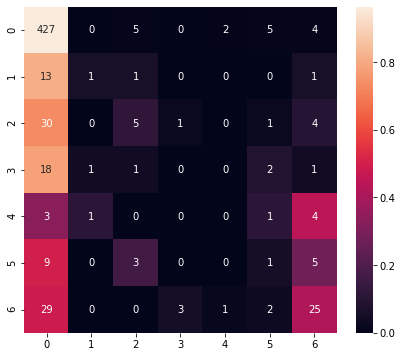

In [6]:
#Confusion matrix and kappa score for testing set

predictions = [round(value) for value in pred]

cm = confusion_matrix(y_test, predictions)

def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g')

plot_confusion_matrix(cm)

print( "kappa score:  ", cohen_kappa_score(y_test, predictions))

In [ ]:
#HyperParameter Tuning
param_grid = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 10],
              'min_samples_leaf': [3, 5, 7, 10],  
              'max_features': [1.0, 0.3, 0.1] 
              }

est = GradientBoostingRegressor(n_estimators=3000)
gs_cv = GridSearchCV(est, param_grid).fit(X_train, y_train.values.ravel())

#Best hyperparameter setting
print('Best hyperparameters: %r' % gs_cv.best_params_)

In [ ]:
# refit model on best parameters
est.set_params(**gs_cv.best_params_)
est.fit(X_train, y_train.values.ravel())

In [4]:
gbrt=GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train,y_train.values.ravel())
print("accuracy on training: %f" % gbrt.score(X_train,y_train.values.ravel()))
print('\n'"accuracy on test: %f" % gbrt.score(X_test,y_test))

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train.values.ravel())
print('\n'"accuracy on training set: %f" % gbrt.score(X_train, y_train.values.ravel()))
print('\n'"accuracy on test set: %f" % gbrt.score(X_test, y_test))

 
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train.values.ravel())
print('\n'"accuracy on training set: %f" % gbrt.score(X_train, y_train.values.ravel()))
print('\n'"accuracy on test set: %f" % gbrt.score(X_test, y_test))


accuracy on training0.990159

accuracy on test0.303279

accuracy on training set: 0.457080

accuracy on test set: 0.257377

accuracy on training set: 0.447786

accuracy on test set: 0.272131


In [5]:
#Regression Test
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train.values.ravel())
GradientBoostingRegressor(random_state=0)
reg.predict(X_test[1:2])
reg.score(X_test, y_test)

0.5451215341121071

In [6]:
#Training GBR Model
params = {'n_estimators': 3, 'max_depth': 3, 'learning_rate': 1, 'criterion': 'mse'}
gradient_boosting_regressor_model = GradientBoostingRegressor(**params)
gradient_boosting_regressor_model.fit(data1, s1.values.ravel())

#Evaluating the Model (x, y size needs to be adjusted)
#plt.figure(figsize = (12,6))
#plt.scatter(data1, s1.values.ravel())
#plt.plot(data1, gradient_boosting_regressor_model.predict(data1), color = 'black')
#plt.show()

GradientBoostingRegressor(criterion='mse', learning_rate=1, n_estimators=3)

In [13]:
#Evaluate the model
y_pred = est.predict(X_test)
print(classification_report(y_test, y_pred))

#Model Accuracy
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
#Model Precision
print('Precision:', metrics.precision_score(y_test, y_pred, average = None))
#Model Recall
print('Recall:', metrics.recall_score(y_test, y_pred,  average = None))

              precision    recall  f1-score   support

         0.0       0.52      0.82      0.63       130
         5.0       0.22      0.31      0.26        51
        10.0       0.14      0.05      0.08        19
        15.0       0.22      0.21      0.22        67
        20.0       0.22      0.10      0.14        39
        25.0       0.20      0.16      0.18        37
        30.0       0.29      0.32      0.31        59
        35.0       0.14      0.06      0.09        16
        40.0       0.11      0.12      0.12        24
        45.0       0.00      0.00      0.00        22
        50.0       0.29      0.24      0.26        42
        55.0       0.12      0.05      0.07        21
        60.0       0.00      0.00      0.00        11
        65.0       0.22      0.17      0.19        12
        75.0       0.34      0.48      0.40        25
        85.0       0.11      0.09      0.10        11
       100.0       0.40      0.20      0.27        10
       116.0       0.25    